In [1]:
import numpy as np
import matplotlib.pyplot as plt
import io
import bson
from skimage.data import imread
from tqdm import tqdm

%matplotlib inline

import pandas as pd

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.preprocessing import LabelEncoder
from __future__ import division


In [16]:
path = "/home/edwin/Datasets/cdiscounts/"
train_path = path +  "train_example.bson"
train_path_full = path + "train.bson"
test_path = path + "test.bson"

# df.to_pickle(file_name) 
# df = pd.read_pickle(file_name)

In [3]:
class CDiscountDataset(Dataset):
    def __init__(self, transform=None):
        file_read = open(train_path, 'rb').read()
        docs = bson.decode_all(file_read)
        self.c_discount_frame = pd.DataFrame.from_dict(docs)
        y = self.c_discount_frame.category_id.values
        encoder = LabelEncoder()
        encoder.fit(y)
        self.encoded_y = encoder.transform(y)
        self.transform = transform
    
    def __len__(self):
        return len(self.c_discount_frame)
    
    def __getitem__(self, idx):
        # todo: There is more than one image, should make it consider that         
        image = c_discount_dataset.dataframe().loc[idx].imgs[0]['picture']
        image = imread(io.BytesIO(image))
        category_id = c_discount_dataset.dataframe().loc[0].category_id
        sample = {'image': image, 
                  'label': self.encoded_y[idx] }
        return sample
    
    def dataframe(self):
        return self.c_discount_frame

In [44]:
class CDiscountValidationSet(Dataset):
    def __init__(self, transform=None):
        file_read = open(train_path_full, 'rb').read()
        docs = bson.decode_all(file_read)
        self.c_discount_frame = pd.DataFrame.from_dict(docs)
        y = self.c_discount_frame.category_id.values
        encoder = LabelEncoder()
        encoder.fit(y)
        self.encoded_y = encoder.transform(y)
        self.transform = transform
        
    def __len__(self):
        return len(self.c_discount_frame)
    
    def __getitem__(self, idx):
        # todo: There is more than one image, should make it consider that         
        image = c_discount_dataset.dataframe().loc[idx].imgs[0]['picture']
        image = imread(io.BytesIO(image))
        category_id = c_discount_dataset.dataframe().loc[0].category_id
        sample = {'image': image, 
                  'label': self.encoded_y[idx] }
        return sample
    
    def dataframe(self):
        return self.c_discount_frame

IndentationError: expected an indented block (<ipython-input-44-2234946f736b>, line 13)

In [40]:
# Create Train Set
# Create Validation Set
# Create Test Set

class CDiscountTestDataset(Dataset):
    def __init__(self, transform=None):
        self.c_discount_frame = self.create_dataframe(15)
        # file_read = open(test_path, 'rb').read()
        # docs = bson.decode_all(file_read)
        # self.c_discount_frame = pd.DataFrame.from_dict(docs)
        # y = self.c_discount_frame.category_id.values
        # encoder = LabelEncoder()
        # encoder.fit(y)
        # self.encoded_y = encoder.transform(y)
        # self.transform = transform
    
    def __len__(self):
        return len(self.c_discount_frame)
    
    def __getitem__(self, idx):
        # todo: There is more than one image, should make it consider that         
        image = self.c_discount_frame.loc[idx].image
        image = imread(io.BytesIO(image))
        sample = {'image': image}
        return sample
    
    def create_dataframe(self, length):
        file = open(test_path, 'rb')
        docs = bson.decode_file_iter(file)
        data = {
            '_id': [],
            'image': []
        }
        for c, d in enumerate(docs):
            data['_id'].append(d['_id'])
            data['image'].append(d['imgs'][0]['picture'])
            if c == length:
                break
        dataframe = pd.DataFrame(data=data)
        return dataframe
    
    def dataframe(self):
        return self.c_discount_frame

In [41]:
c_discount_test_set = CDiscountTestDataset()

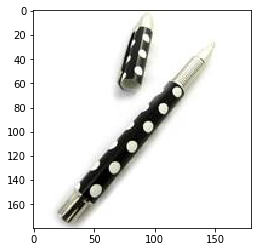

In [42]:
plt.imshow(c_discount_test_set[13]['image'])

In [50]:
file_read = open(train_path_full, 'rb')
# docs = bson.decode_all(file_read)

In [27]:
file = open(train_path_full, 'rb')
docs = bson.decode_file_iter(file)
prod_to_category = dict()

count = 0
for c, d in enumerate(docs):
    product_id = d['_id']
    category_id = d['category_id']
    image = d['imgs'][0]['picture']
    prod_to_category[product_id] = (image, category_id)
    data['image'].append(image)
    count += 1
    if count == 100:
        break
dataframe = pd.DataFrame.from_dict(prod_to_category, orient='index')
dataframe.to_pickle("sample_train_set.pkl") 
# df = pd.read_pickle(file_name)


In [30]:
# how to randomize a dataframe
dataframe.sample(frac=1)

,0,1
33,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,1000010647
18,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,1000018294
123,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,1000012493
7,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,1000004079
74,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,1000010653
87,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,1000010461
38,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,1000010653
1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,1000010653
0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,1000010653
90,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,1000010653


In [14]:
df = pd.read_pickle("sample_train_set.pkl")
df = df.set_index('_id')
df

,image
_id,
0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
5,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
6,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
7,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
8,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...


In [19]:
next(enumerate(docs))

(0,
 {'_id': 126,
  'category_id': 1000010667,
  'imgs': [{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xb4\x00\xb4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb